In [10]:
# Load Libraries
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [11]:
# Generate Regression Dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

In [12]:
# Standardize Dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]


In [13]:
# Split into Train and Test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [14]:
# Network
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

In [15]:
# Compile
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

In [17]:
# Fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# Evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print("Train MSE : {} and Test MSE : {}".format(train_mse, test_mse))
# Train MSE : 0.0018344850977882743 and Test MSE : 0.003977226093411446

Train MSE : 0.0004916830803267658 and Test MSE : 0.00102196482475847


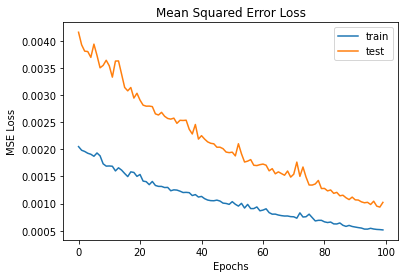

In [18]:
# Plot MSE
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Mean Squared Error Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

In [19]:
!jupyter nbconvert --to script mean_squared_error_loss_training_epochs_regression.ipynb

[NbConvertApp] Converting notebook mean_squared_error_loss_training_epochs_regression.ipynb to script
[NbConvertApp] Writing 1784 bytes to mean_squared_error_loss_training_epochs_regression.py
